In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DIRECTORY = "results"

file = ""
file_example = "example_measurement.csv"

path = f"{file_example}" if file == "" else f"../{DIRECTORY}/{file}"

df = pd.read_csv(f"{path}", header=[0])
timestamps = df["elapsed_time"].unique()
powers = df[df["elapsed_time"] == timestamps[0]].groupby("card_serial", dropna=True)[
    "load_power"
]
print(powers.sum())

card_serial
DT00    14.116426
DT01    14.116426
DT02    14.116426
DT03    14.116426
DT04    14.116426
DT05    14.116426
DT06    14.116426
DT07    14.116426
DT08    14.116426
Name: load_power, dtype: float64


Card serial DT00 has achieved steady-state...


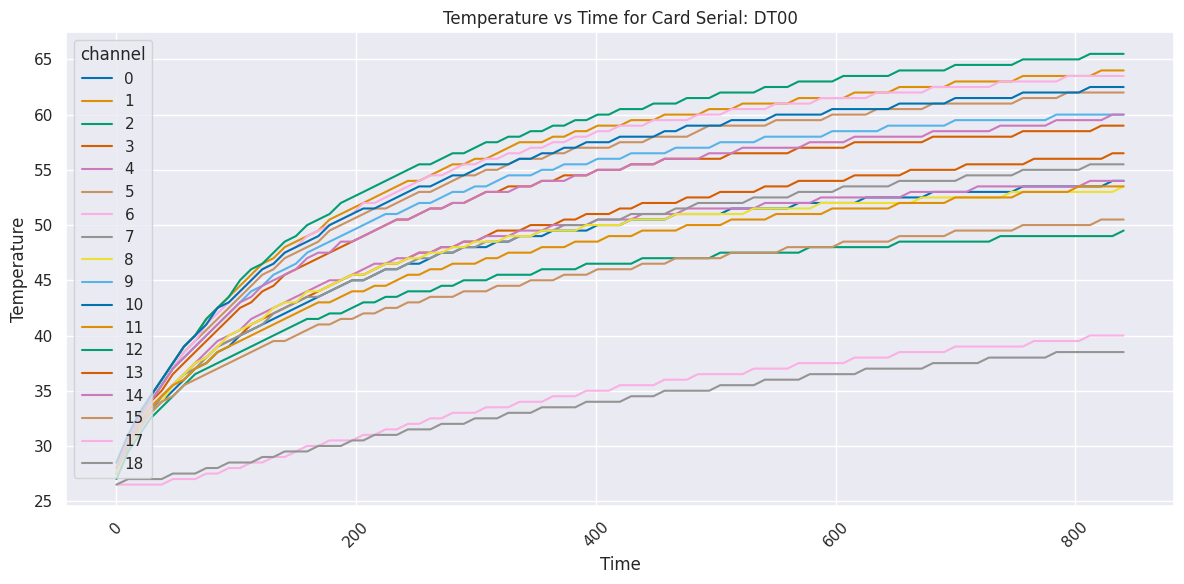

Card serial DT01 has achieved steady-state...


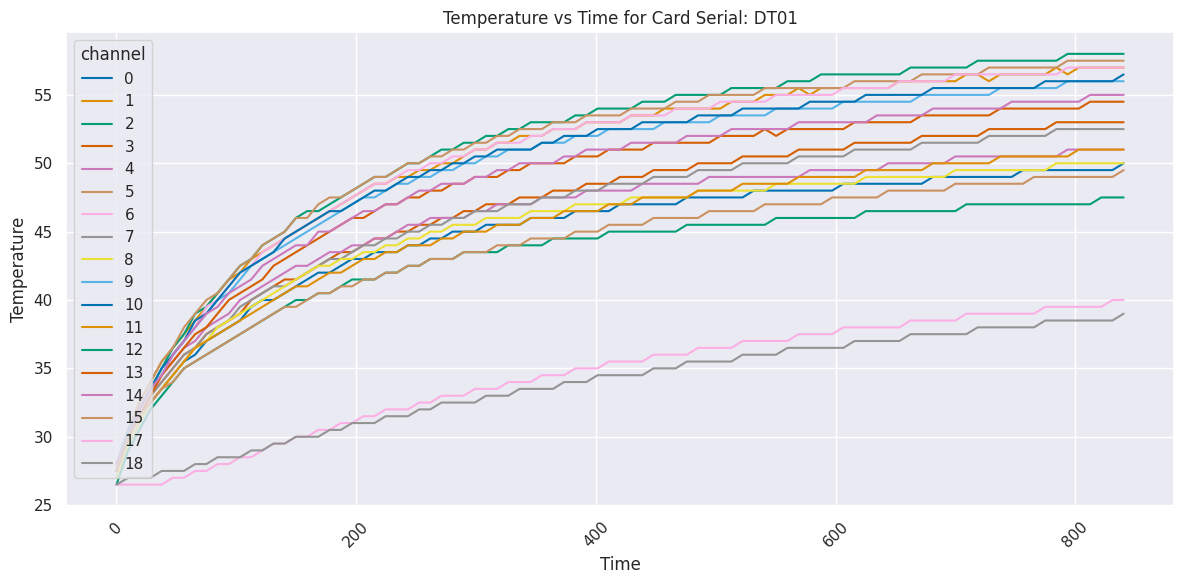

Card serial DT02 has achieved steady-state...


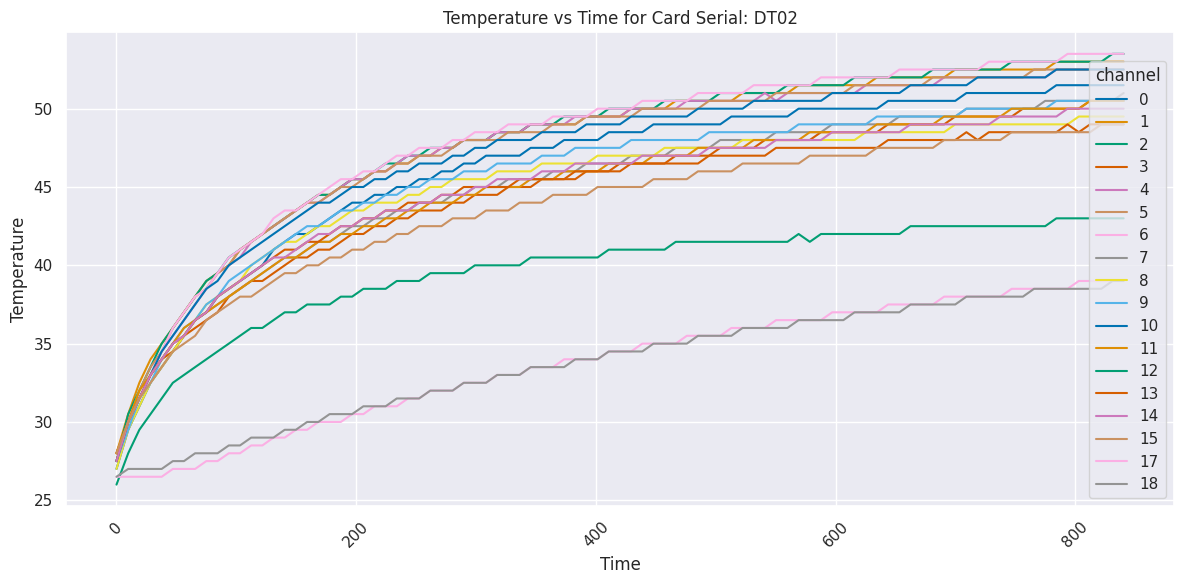

Card serial DT03 has achieved steady-state...


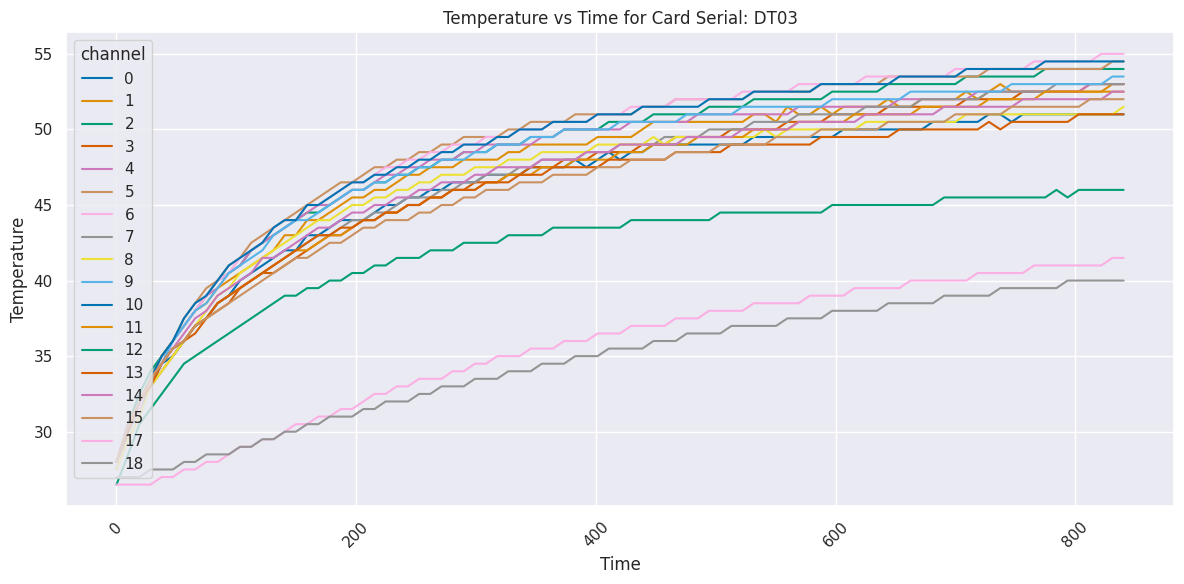

Card serial DT04 has achieved steady-state...


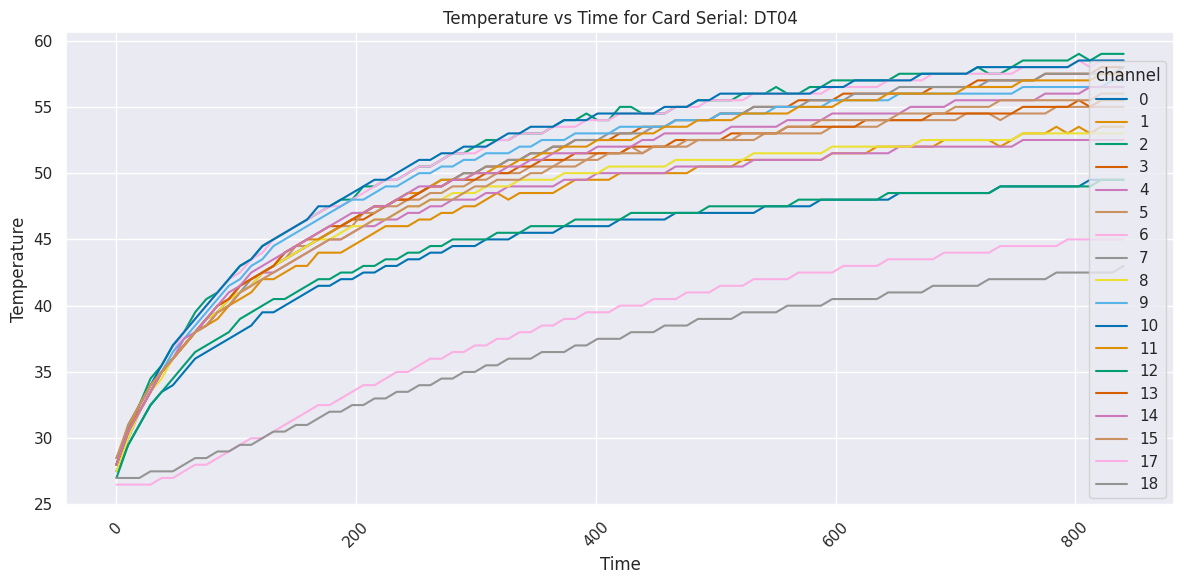

Card serial DT05 has achieved steady-state...


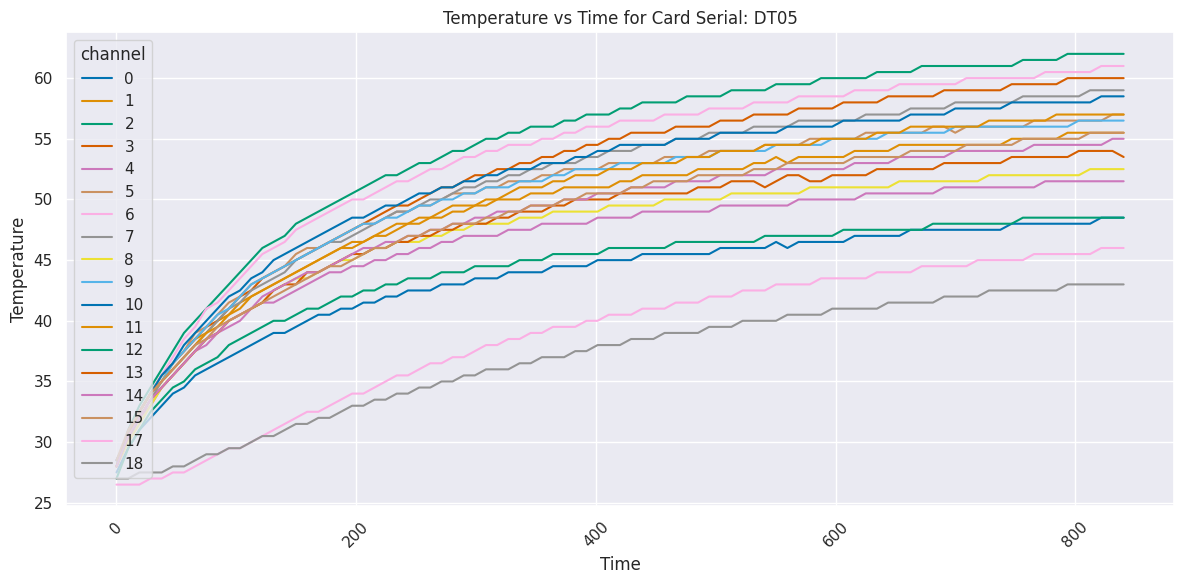

Card serial DT06 has achieved steady-state...


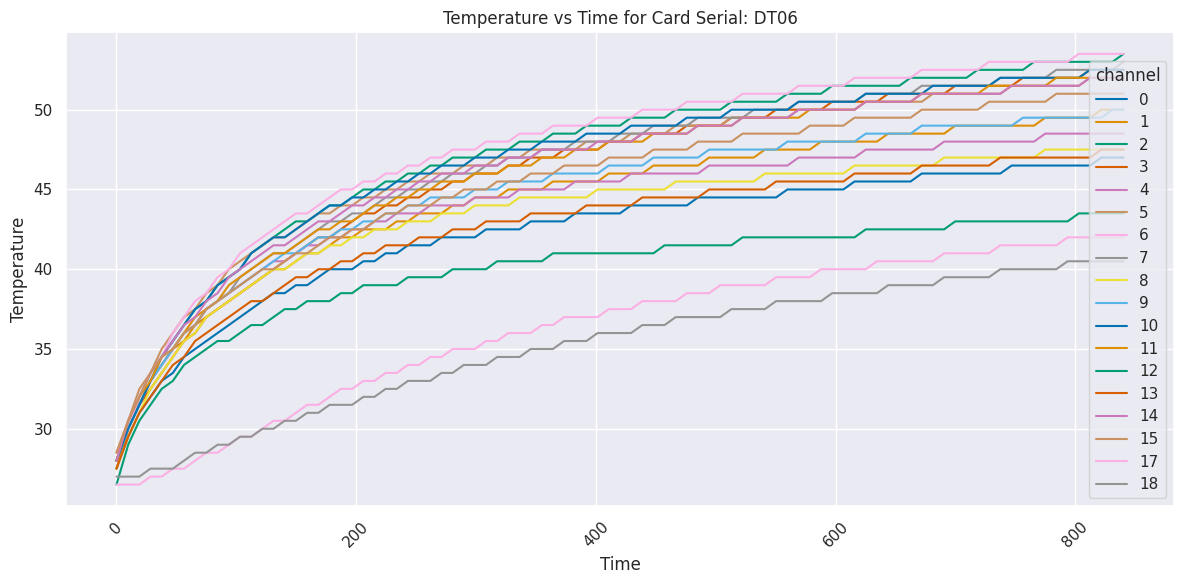

Card serial DT07 has achieved steady-state...


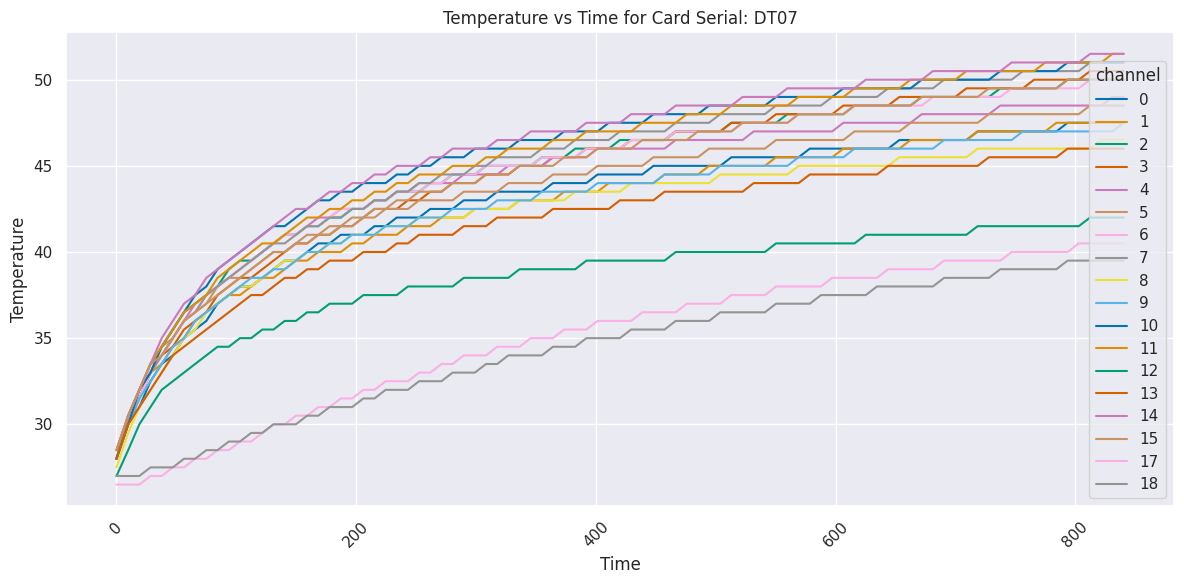

Card serial DT08 has achieved steady-state...


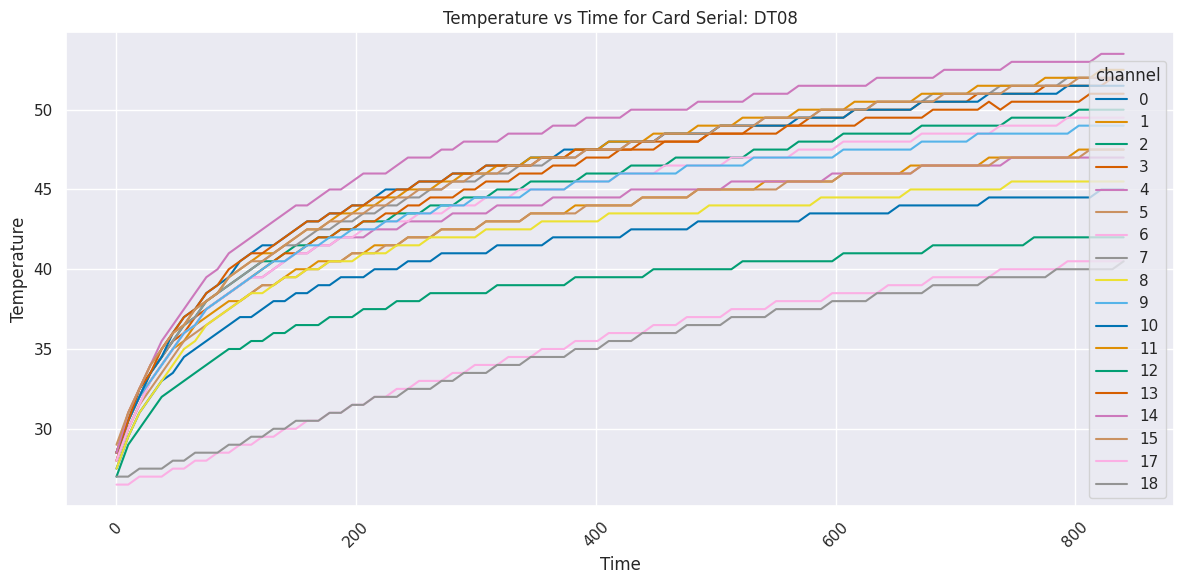

In [4]:
sns.set_theme(style="darkgrid", palette="colorblind")

# drop entries with channel == "16"
df_lower_ch_count = df[df["channel"] != 16]

card_serials = df_lower_ch_count["card_serial"].unique()
for card_serial in card_serials:
    card_df = df_lower_ch_count[df_lower_ch_count["card_serial"] == card_serial]
    if any(card_df["steady_state"] == True):
        print(f"Card serial {card_serial} has achieved steady-state...")
        # continue
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=card_df,
        x="elapsed_time",
        y="temperature",
        hue="channel",
        palette="colorblind",
    )
    plt.title(f"Temperature vs Time for Card Serial: {card_serial}")
    plt.xlabel("Time")
    plt.ylabel("Temperature")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

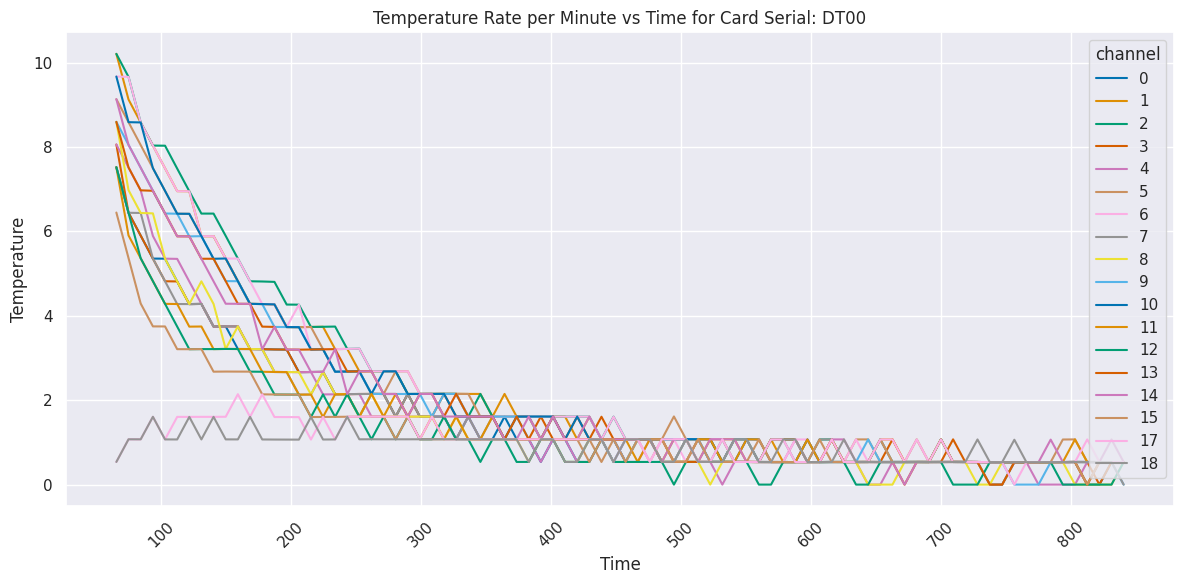

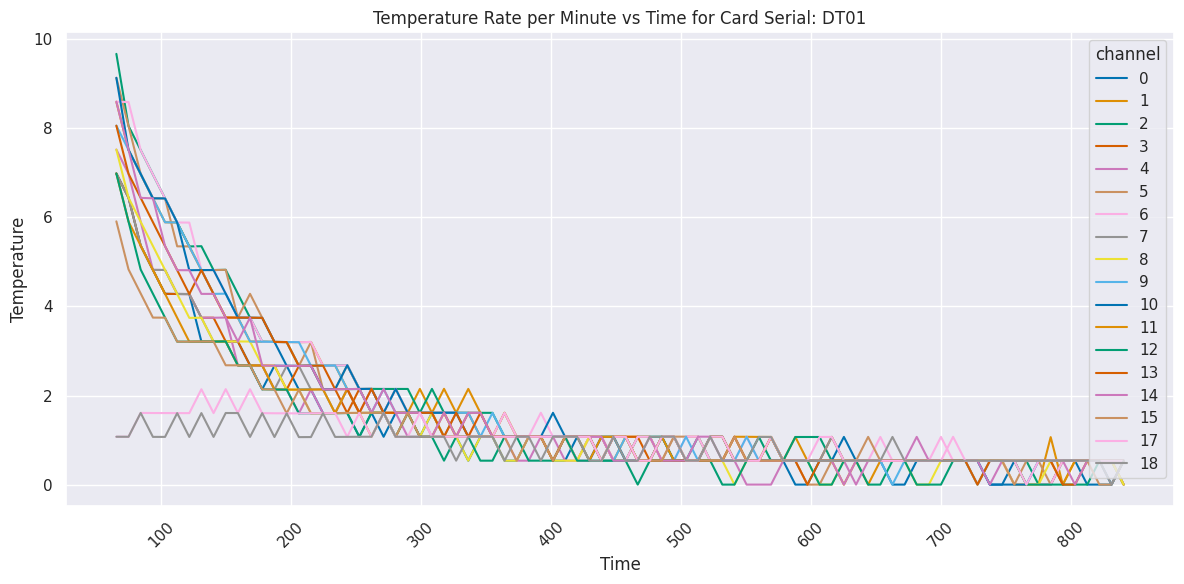

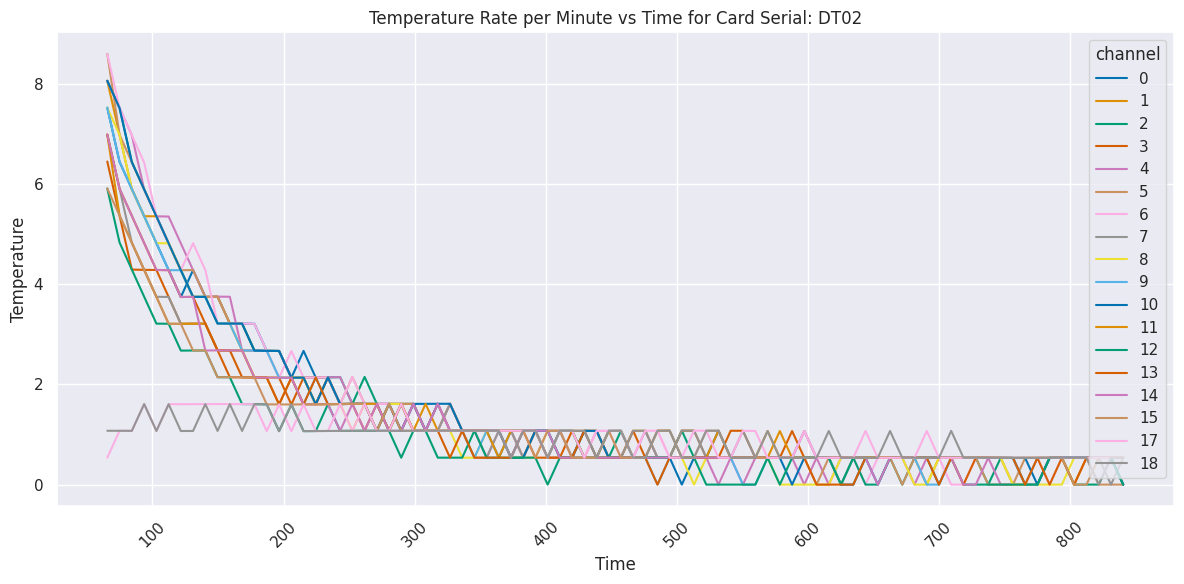

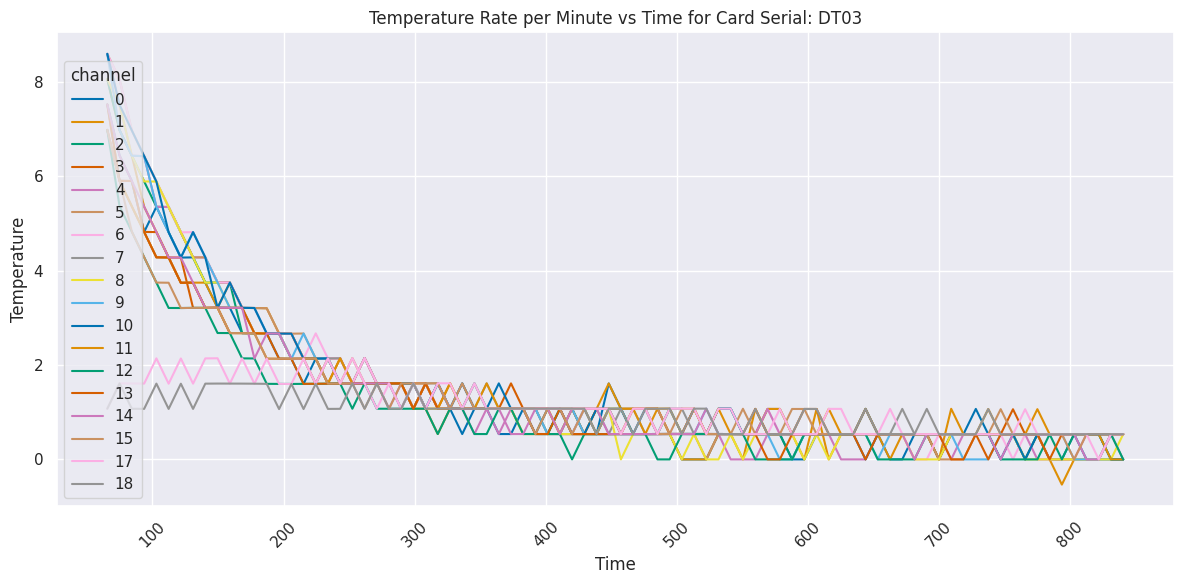

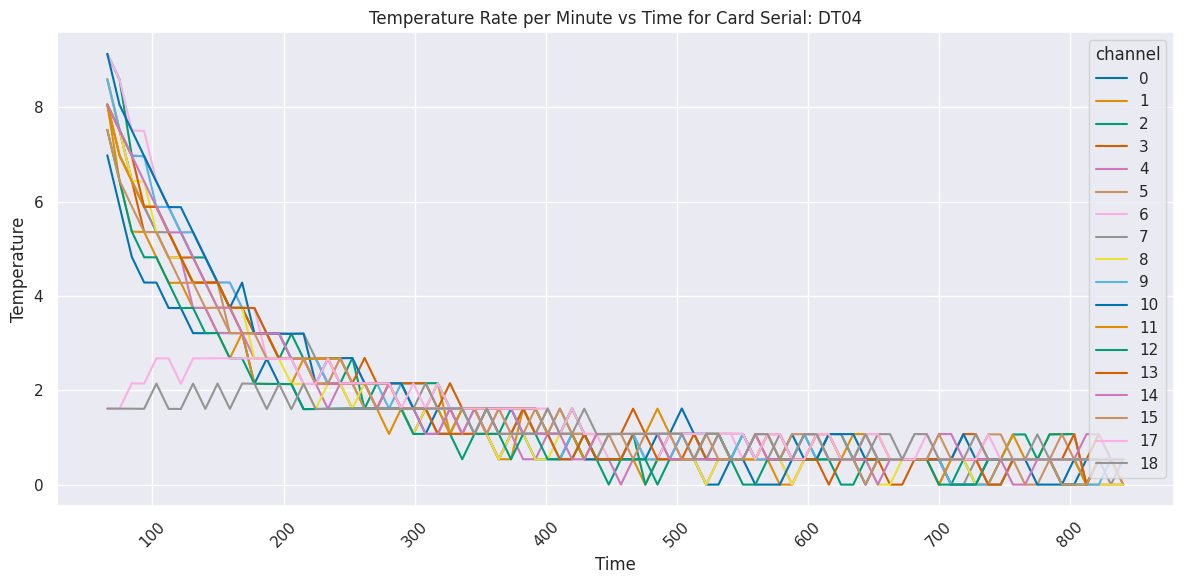

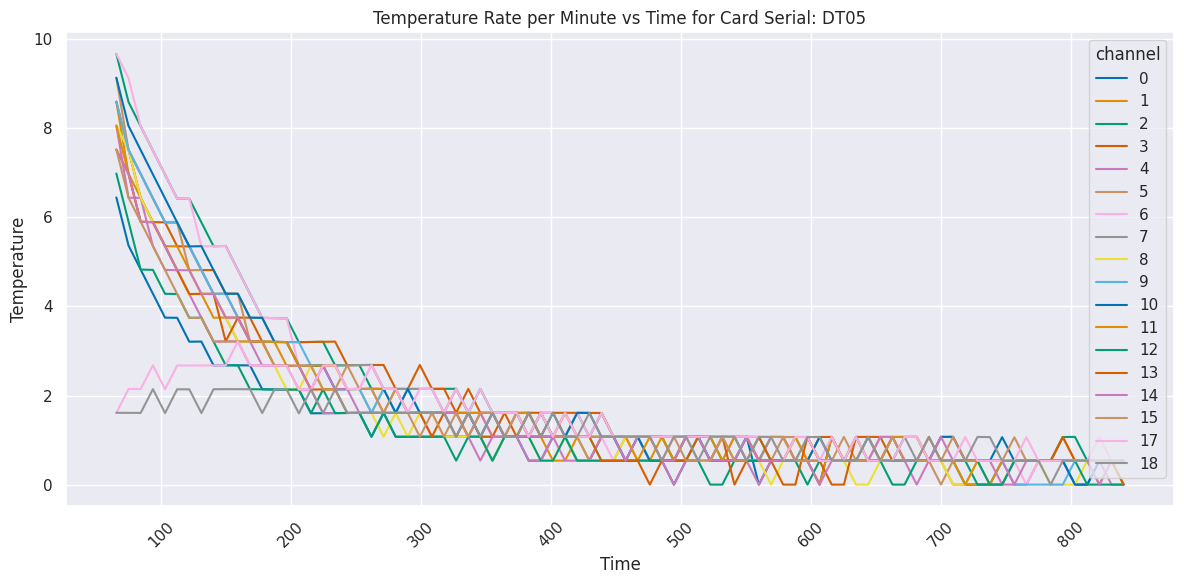

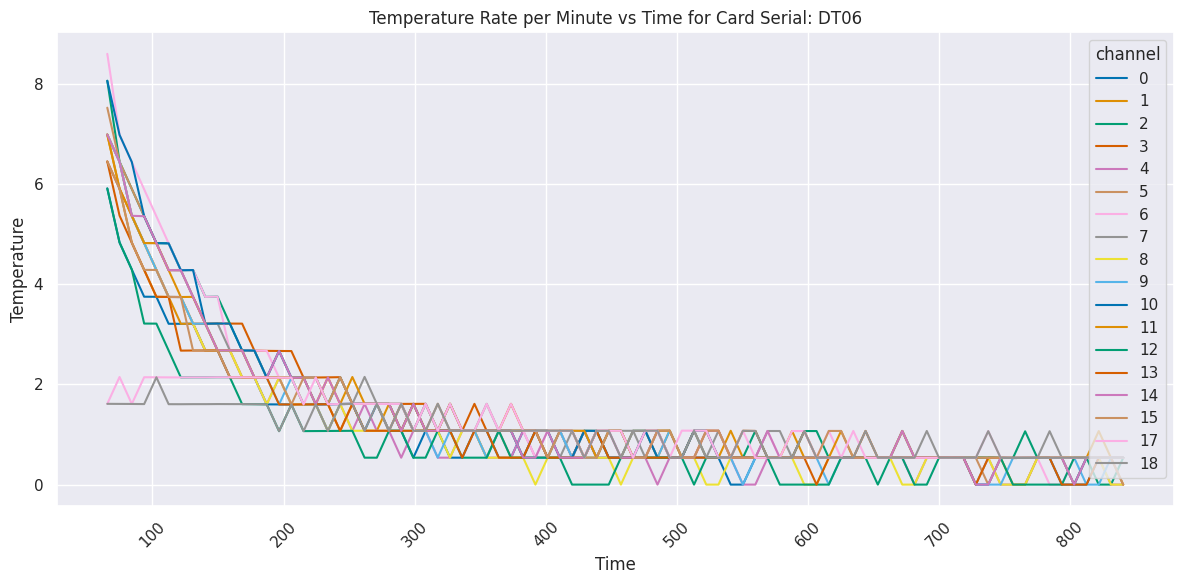

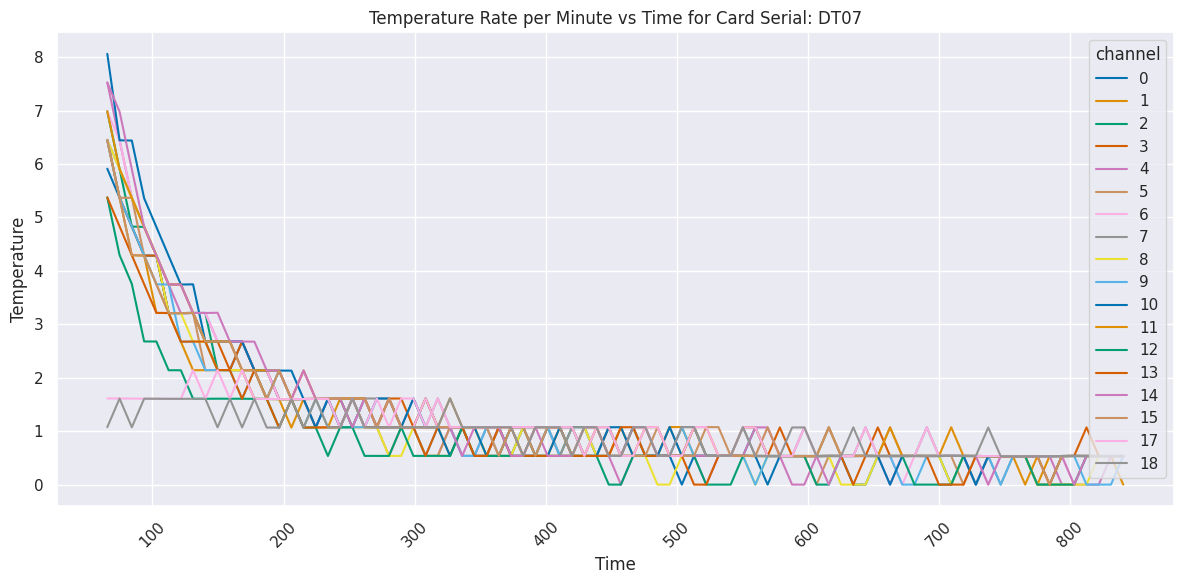

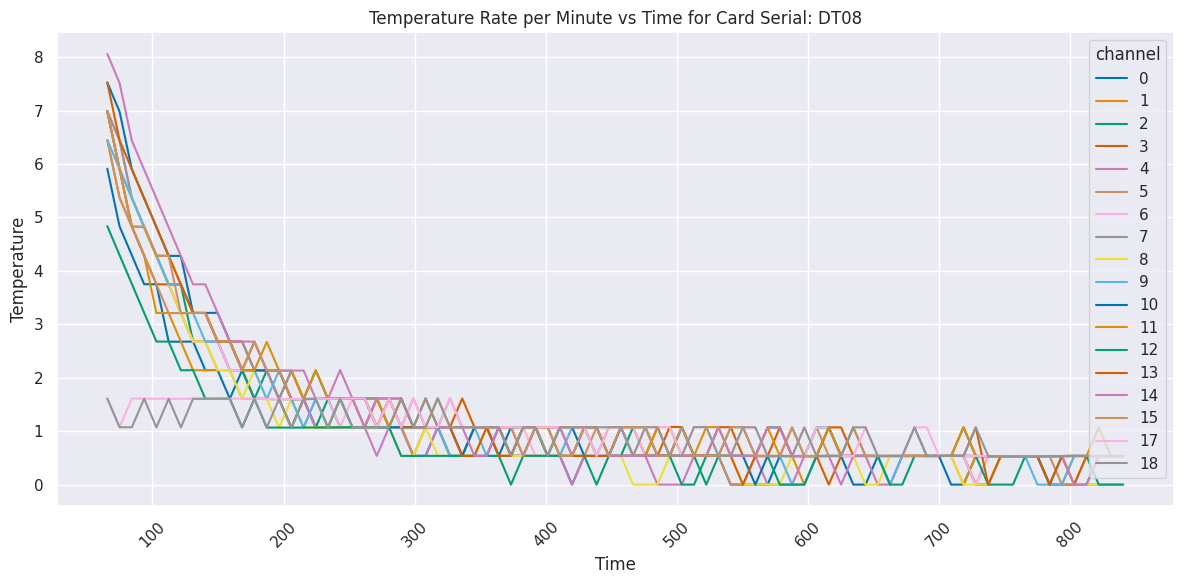

In [5]:
for card_serial in card_serials:
    card_df = df_lower_ch_count[df_lower_ch_count["card_serial"] == card_serial]
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=card_df,
        x="elapsed_time",
        y="temp_rate_per_min",
        hue="channel",
        palette="colorblind",
    )
    # sns.lineplot(data=card_df, x="elapsed_time", y="temp_rate_per_min")
    plt.title(f"Temperature Rate per Minute vs Time for Card Serial: {card_serial}")
    plt.xlabel("Time")
    plt.ylabel("Temperature")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()